# Logistic Regression

#Load Data and Perform EDA

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

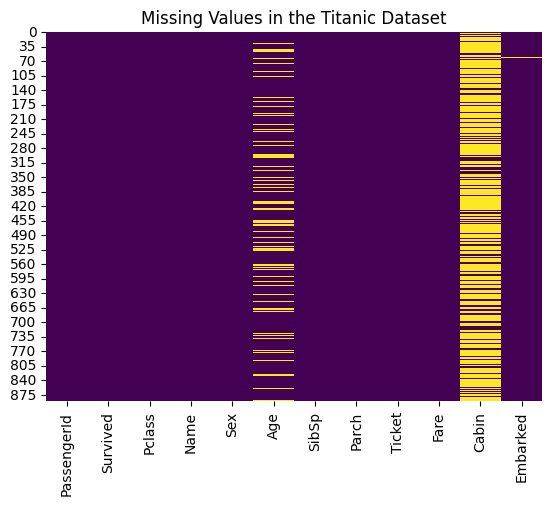

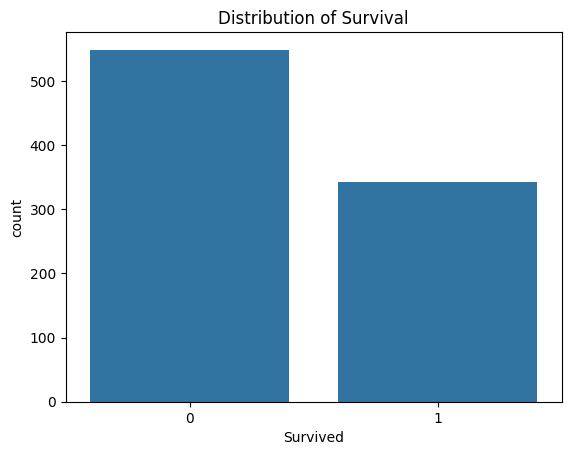

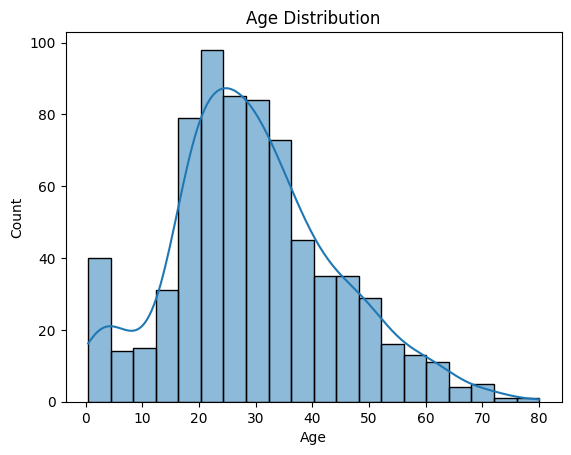

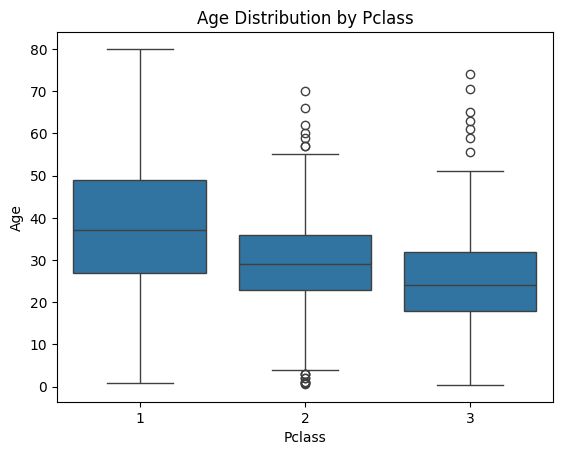

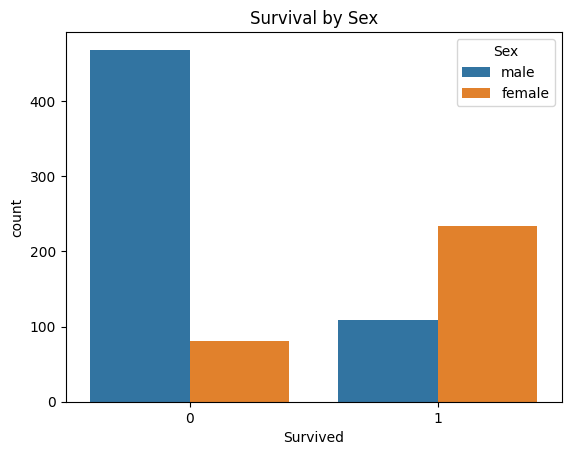

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(titanic.head())

# Get basic information about the dataset
print(titanic.info())

# Summary statistics
print(titanic.describe())

# Check for missing values
print(titanic.isnull().sum())

# Visualize missing values
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Titanic Dataset')
plt.show()

# Visualize the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survival')
plt.show()

# Visualize the distribution of age
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Age Distribution by Pclass')
plt.show()

# Countplot of Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival by Sex')
plt.show()




#Data Preprocessing for Logistic Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[features + ['Survived']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Convert categorical variables to dummy variables
titanic = pd.get_dummies(titanic, drop_first=True)

# Split the data into training and test sets
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-2-b820e5641873>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'] = imputer.fit_transform(titanic[['Age']])
<ipython-input-2-b820e5641873>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


#Implement Logistic Regression

In [3]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#Visualize the Results using Matplotlib

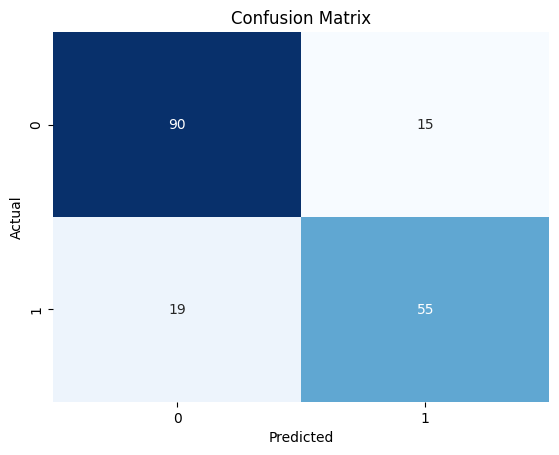

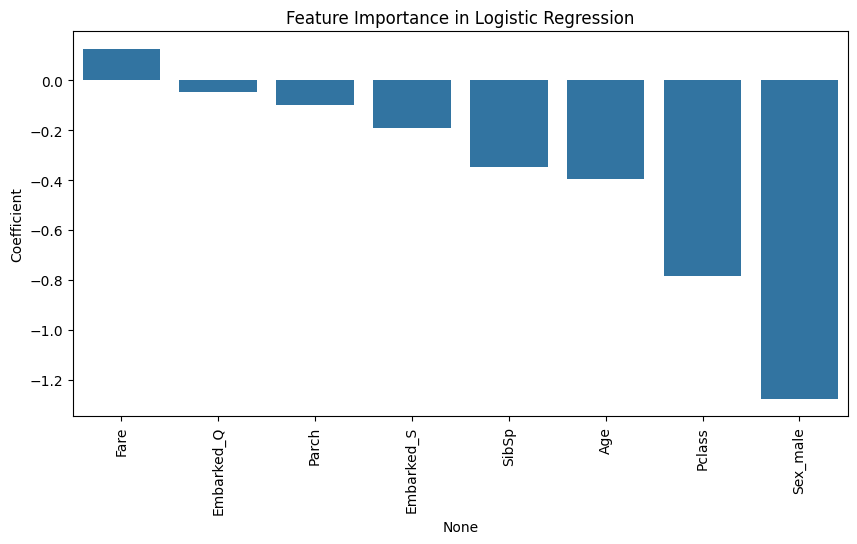

In [4]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the coefficients
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.xticks(rotation=90)
plt.title('Feature Importance in Logistic Regression')
plt.show()


#Linear Regression

#Load and Perform EDA

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

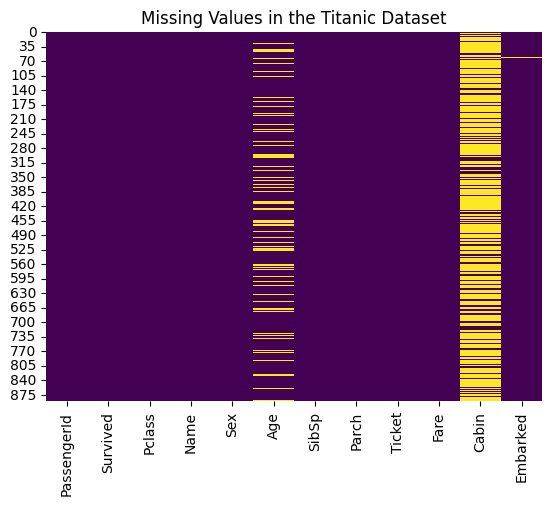

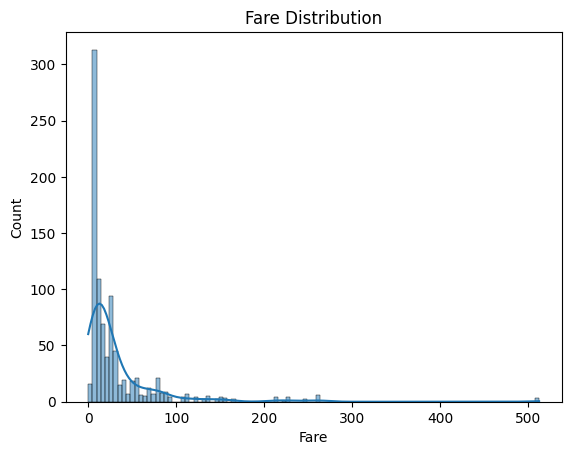

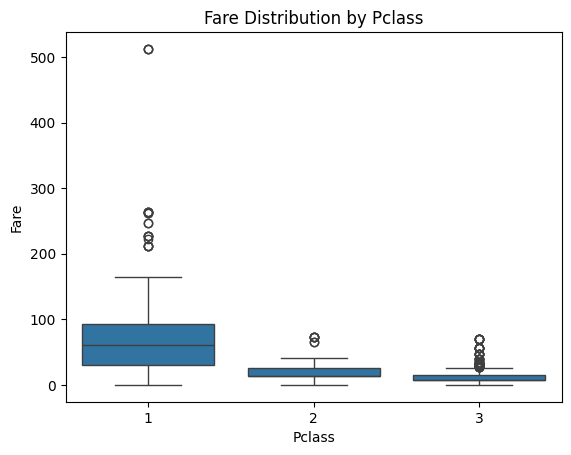

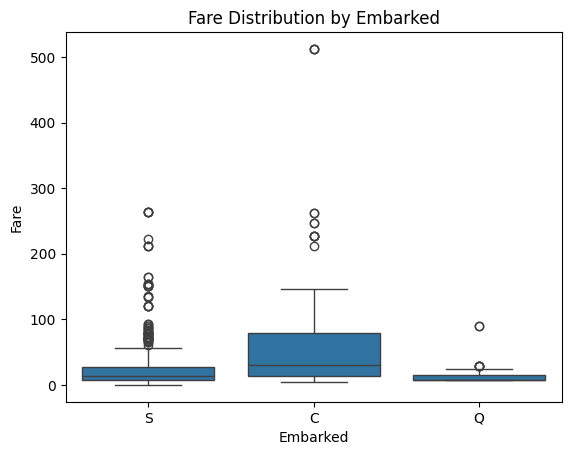

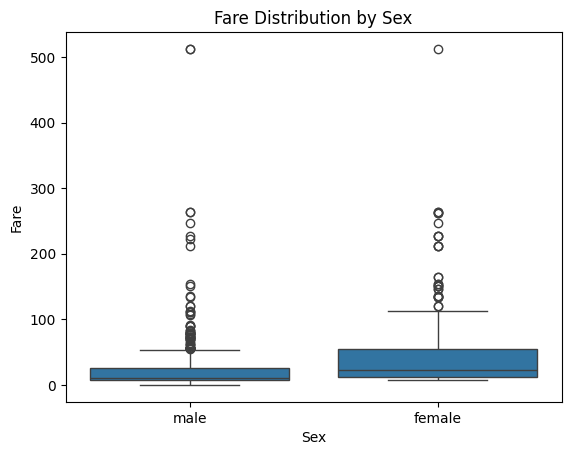

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(titanic.head())

# Get basic information about the dataset
print(titanic.info())

# Summary statistics
print(titanic.describe())

# Check for missing values
print(titanic.isnull().sum())

# Visualize missing values
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Titanic Dataset')
plt.show()

# Visualize the distribution of the target variable (Fare)
sns.histplot(titanic['Fare'].dropna(), kde=True)
plt.title('Fare Distribution')
plt.show()

# Boxplot of Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Fare Distribution by Pclass')
plt.show()

# Boxplot of Fare by Embarked
sns.boxplot(x='Embarked', y='Fare', data=titanic)
plt.title('Fare Distribution by Embarked')
plt.show()

# Boxplot of Fare by Sex
sns.boxplot(x='Sex', y='Fare', data=titanic)
plt.title('Fare Distribution by Sex')
plt.show()


#Data Preprocessing for Linear Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
titanic = titanic[features + ['Fare']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Convert categorical variables to dummy variables
titanic = pd.get_dummies(titanic, drop_first=True)

# Split the data into training and test sets
X = titanic.drop('Fare', axis=1)
y = titanic['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-6-ab813172c142>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'] = imputer.fit_transform(titanic[['Age']])
<ipython-input-6-ab813172c142>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


#Implement Linear Regression

In [7]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 928.6125943999361
R^2 Score: 0.39989994844401944


#Visualize the Results using Matplotlib

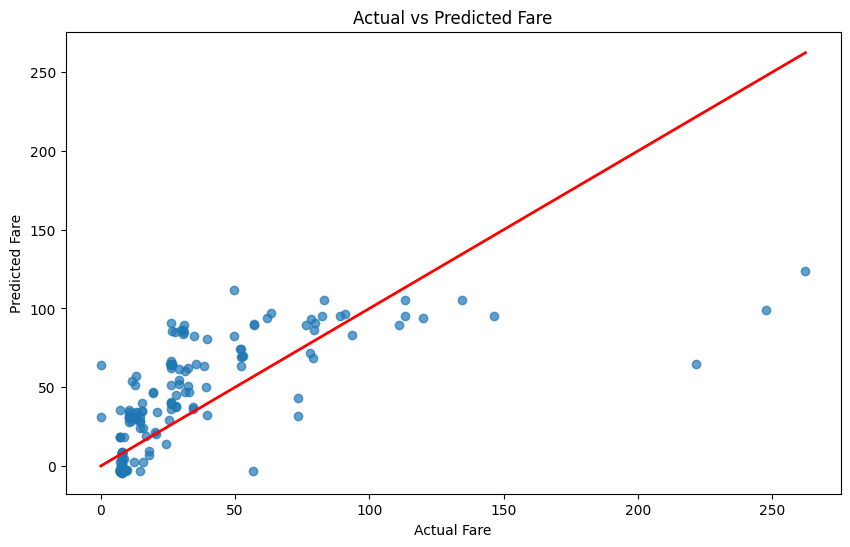

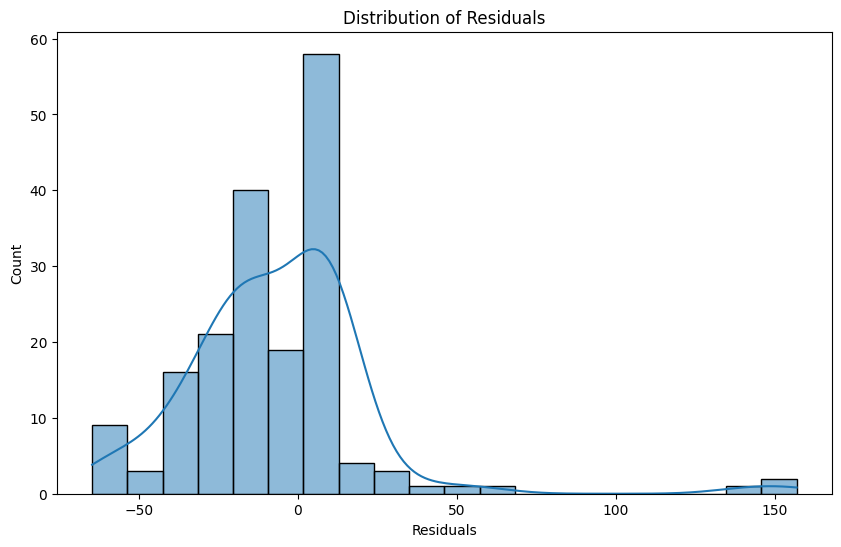

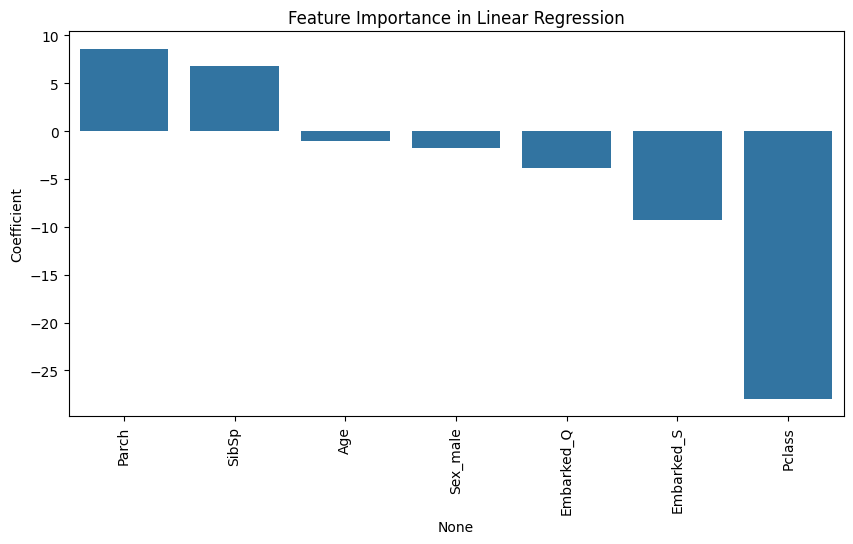

In [8]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.show()

# Visualize the residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# Visualize the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.xticks(rotation=90)
plt.title('Feature Importance in Linear Regression')
plt.show()


#Decision Tree

#Load and Perform EDA

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

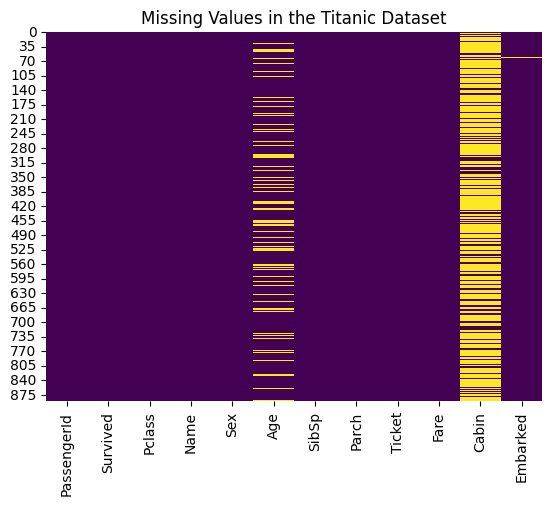

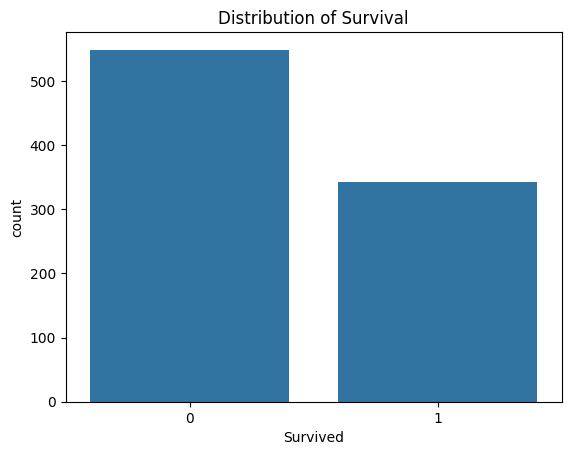

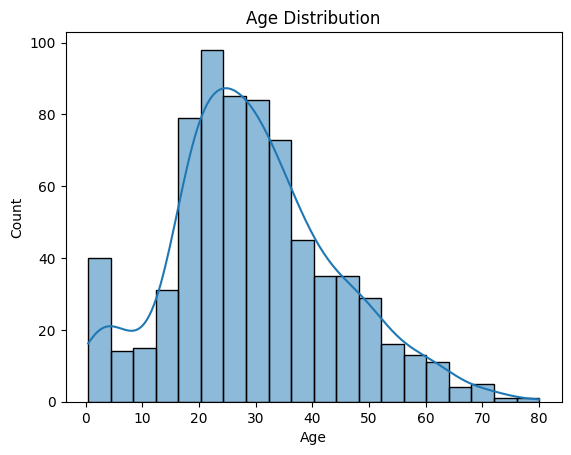

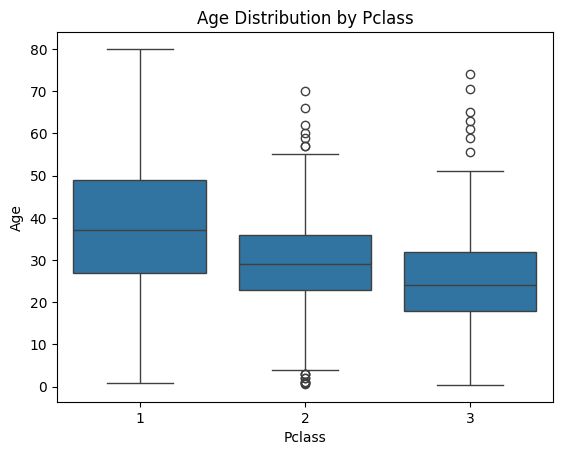

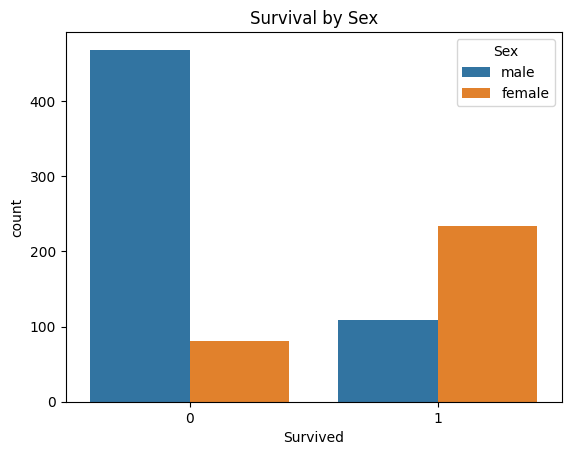

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(titanic.head())

# Get basic information about the dataset
print(titanic.info())

# Summary statistics
print(titanic.describe())

# Check for missing values
print(titanic.isnull().sum())

# Visualize missing values
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Titanic Dataset')
plt.show()

# Visualize the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survival')
plt.show()

# Visualize the distribution of age
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Age Distribution by Pclass')
plt.show()

# Countplot of Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival by Sex')
plt.show()


#Data Preprocessing for Decision Tree

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[features + ['Survived']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Convert categorical variables to dummy variables
titanic = pd.get_dummies(titanic, drop_first=True)

# Split the data into training and test sets
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional for Decision Tree but can be done for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-10-46819f245b40>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'] = imputer.fit_transform(titanic[['Age']])
<ipython-input-10-46819f245b40>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


#Implement Decision Tree

In [11]:
# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


[[84 21]
 [18 56]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

Accuracy: 0.7821229050279329


#Visualize the Results using Matplotlib

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree')
plt.show()

# Visualize the feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


#Random Forest

# Load and Perform EDA

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

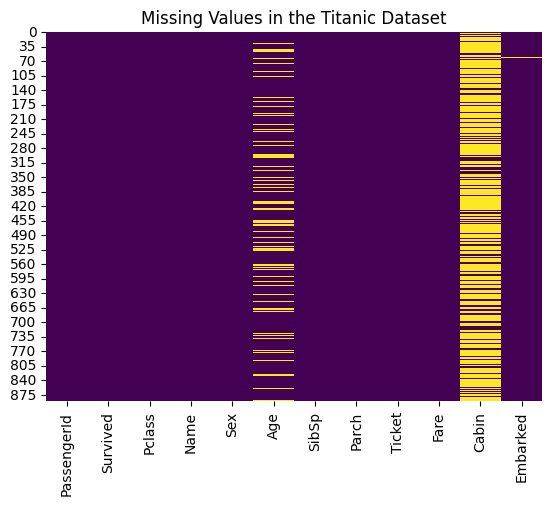

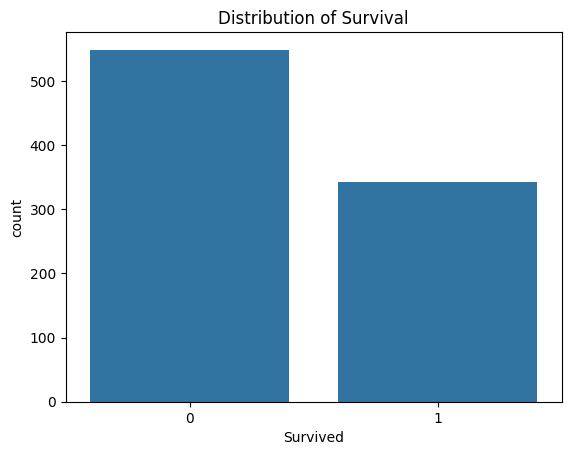

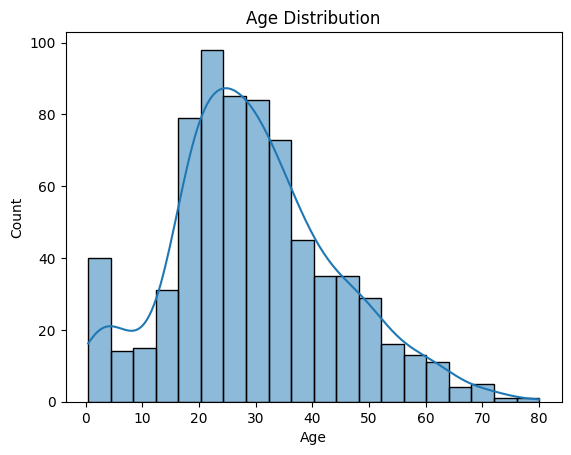

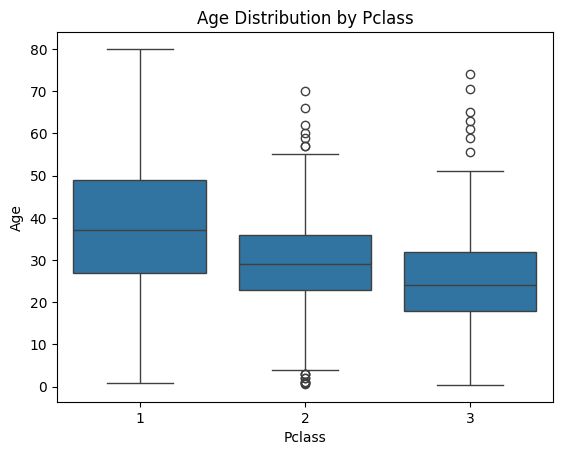

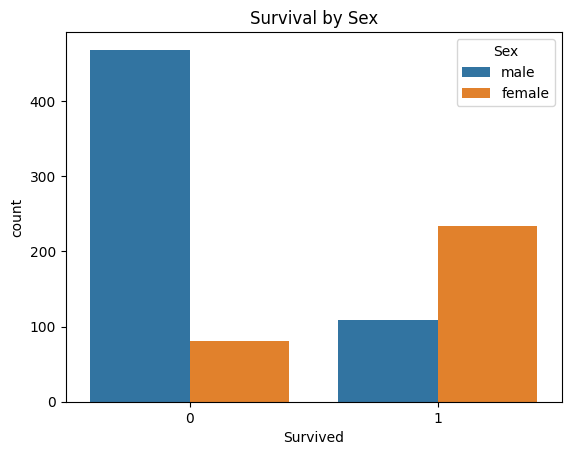

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(titanic.head())

# Get basic information about the dataset
print(titanic.info())

# Summary statistics
print(titanic.describe())

# Check for missing values
print(titanic.isnull().sum())

# Visualize missing values
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Titanic Dataset')
plt.show()

# Visualize the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survival')
plt.show()

# Visualize the distribution of age
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Age Distribution by Pclass')
plt.show()

# Countplot of Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival by Sex')
plt.show()


# Data Preprocessing for Random Forest

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[features + ['Survived']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Convert categorical variables to dummy variables
titanic = pd.get_dummies(titanic, drop_first=True)

# Split the data into training and test sets
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional for Random Forest but can be done for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-13-952aad4f4303>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'] = imputer.fit_transform(titanic[['Age']])
<ipython-input-13-952aad4f4303>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


# Implement Random Forest


In [14]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


[[91 14]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy: 0.8212290502793296


#Visualize the Results using Matplotlib

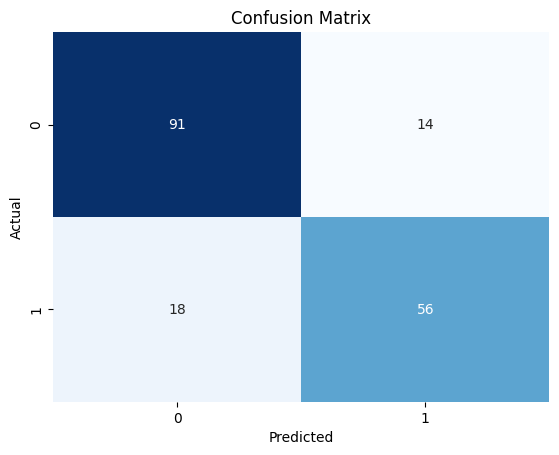

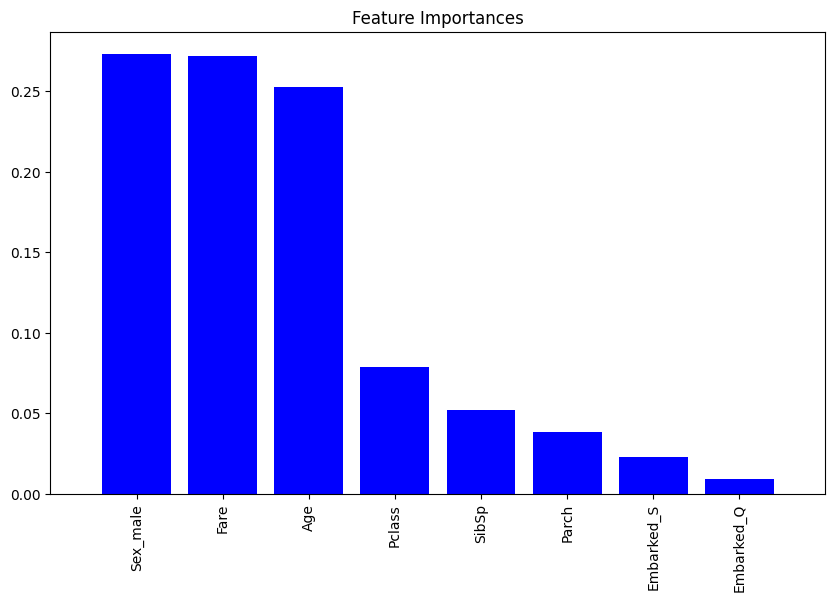

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# SVM

#Load and Perform EDA

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

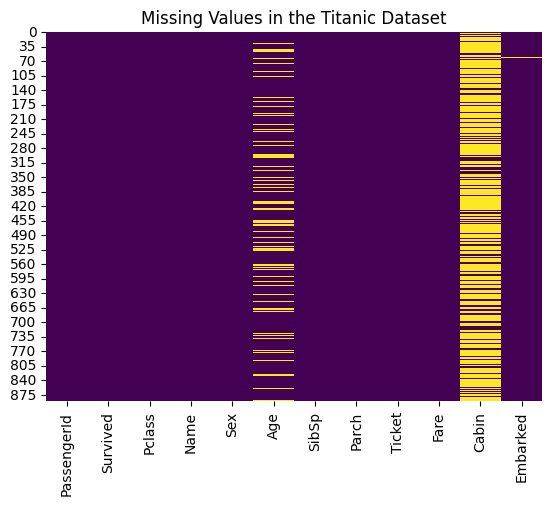

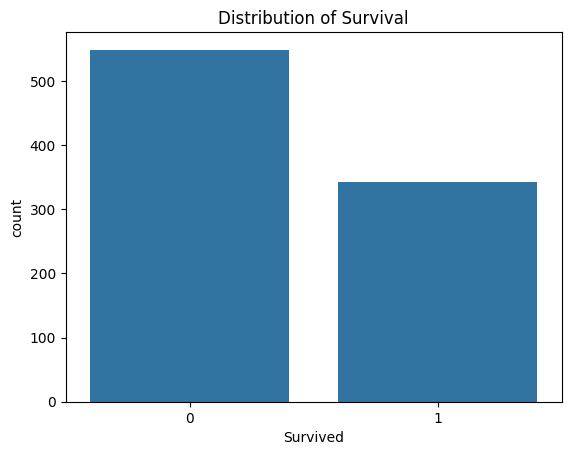

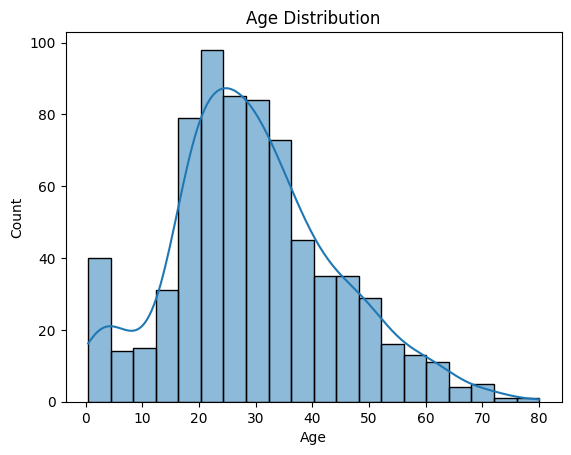

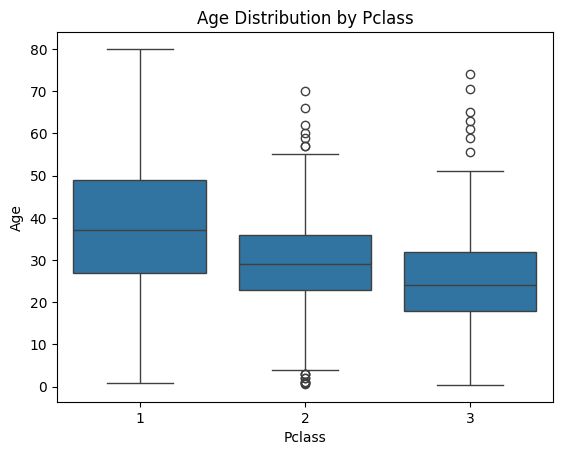

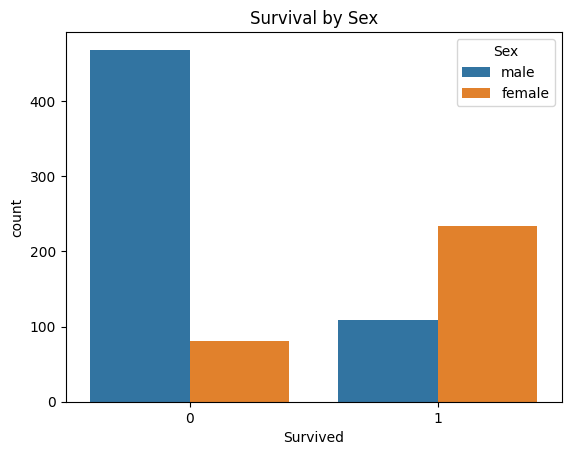

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(titanic.head())

# Get basic information about the dataset
print(titanic.info())

# Summary statistics
print(titanic.describe())

# Check for missing values
print(titanic.isnull().sum())

# Visualize missing values
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Titanic Dataset')
plt.show()

# Visualize the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survival')
plt.show()

# Visualize the distribution of age
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Age Distribution by Pclass')
plt.show()

# Countplot of Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival by Sex')
plt.show()


# Data Preprocessing for SVM

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[features + ['Survived']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Convert categorical variables to dummy variables
titanic = pd.get_dummies(titanic, drop_first=True)

# Split the data into training and test sets
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-17-8d088303c3e0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'] = imputer.fit_transform(titanic[['Age']])
<ipython-input-17-8d088303c3e0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


# Implement SVM

In [18]:
# Train the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


[[88 17]
 [22 52]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Accuracy: 0.7821229050279329


# Visualize the Results using Matplotlib

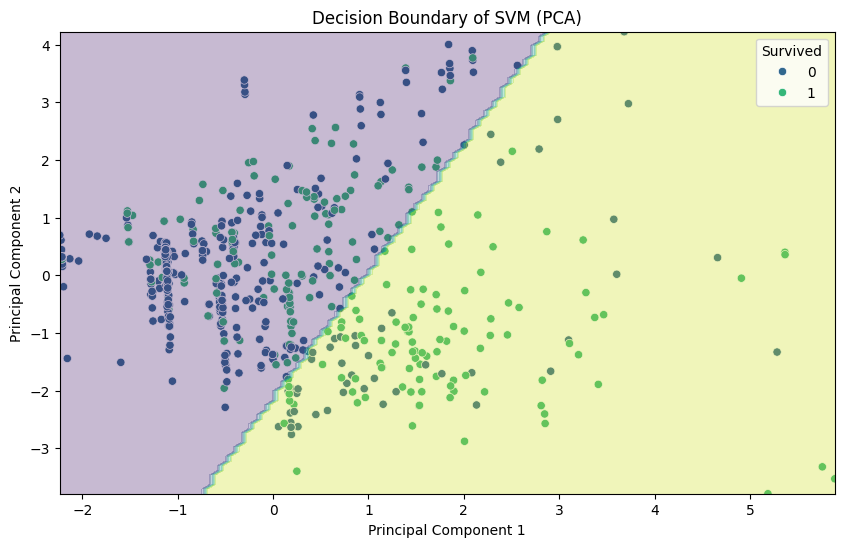

In [21]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Train the SVM model on reduced data
model.fit(X_train_pca, y_train)

# Plot the decision boundary using PCA components
plt.figure(figsize=(10, 6))

# Plot data points
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis')

# Create a meshgrid for decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 100),
                     np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary of SVM (PCA)')
plt.legend(title='Survived', loc='upper right')
plt.show()



#KNN

# Load and Perform EDA

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

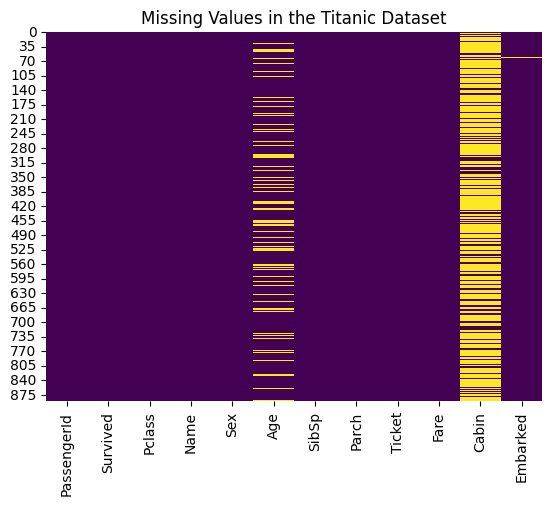

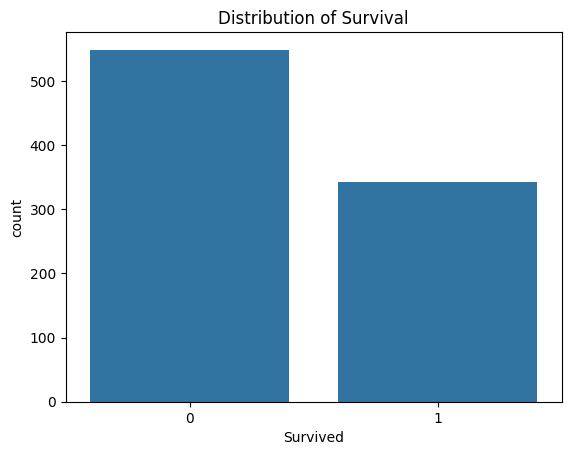

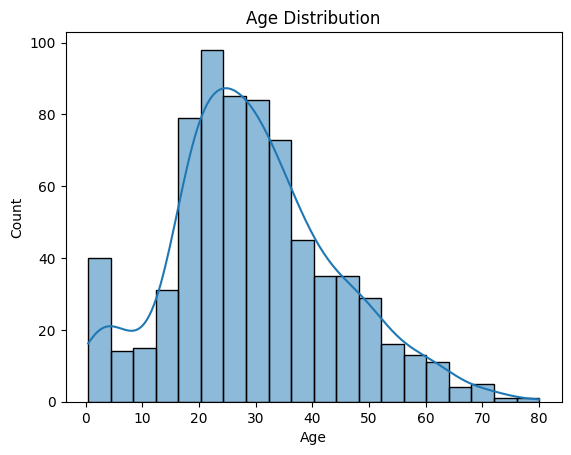

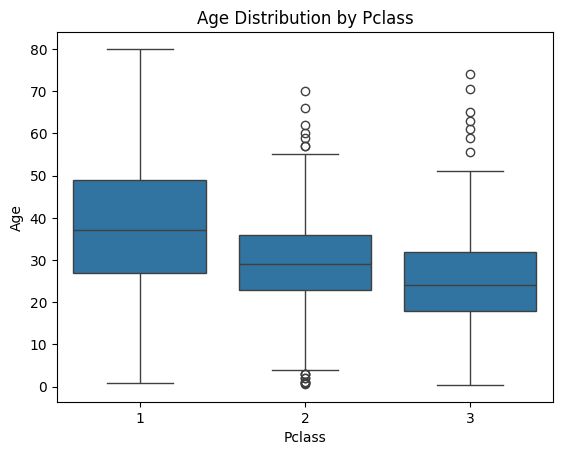

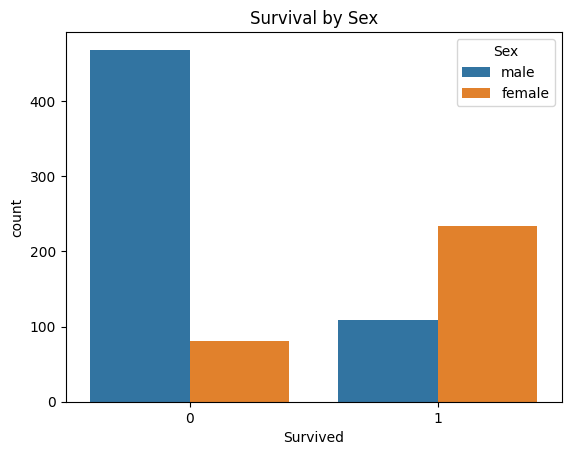

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(titanic.head())

# Get basic information about the dataset
print(titanic.info())

# Summary statistics
print(titanic.describe())

# Check for missing values
print(titanic.isnull().sum())

# Visualize missing values
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Titanic Dataset')
plt.show()

# Visualize the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survival')
plt.show()

# Visualize the distribution of age
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Age Distribution by Pclass')
plt.show()

# Countplot of Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival by Sex')
plt.show()


#Data Preprocessing for KNN

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[features + ['Survived']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Convert categorical variables to dummy variables
titanic = pd.get_dummies(titanic, drop_first=True)

# Split the data into training and test sets
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-23-004553fa076e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'] = imputer.fit_transform(titanic[['Age']])
<ipython-input-23-004553fa076e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


# Implement KNN

In [24]:
# Train the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.8044692737430168


#Visualize the Result

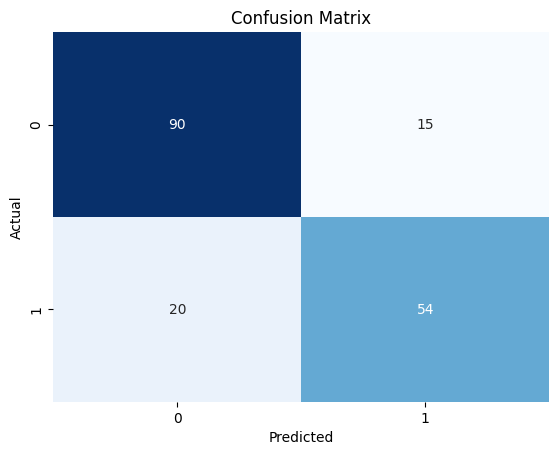

In [25]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Load and Perfoam EDA

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

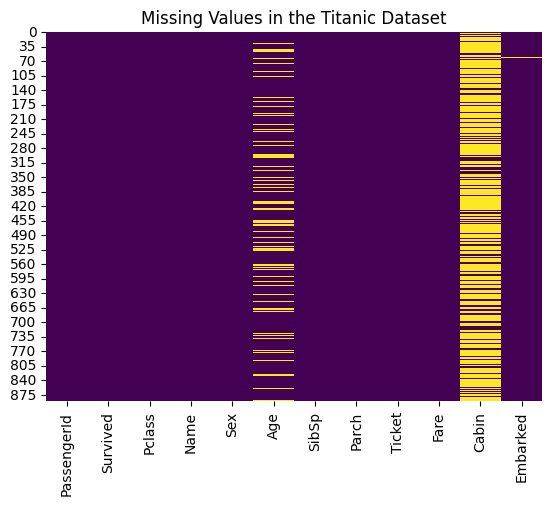

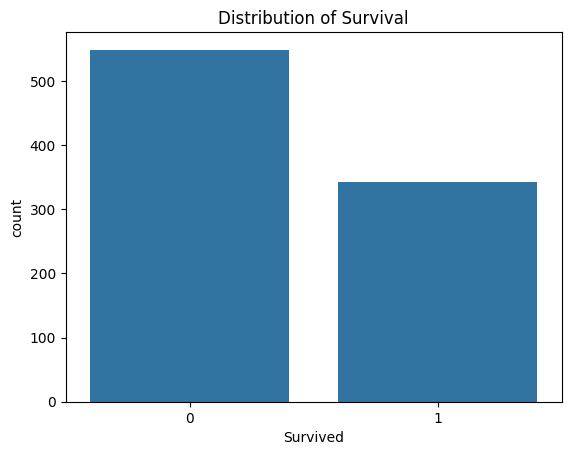

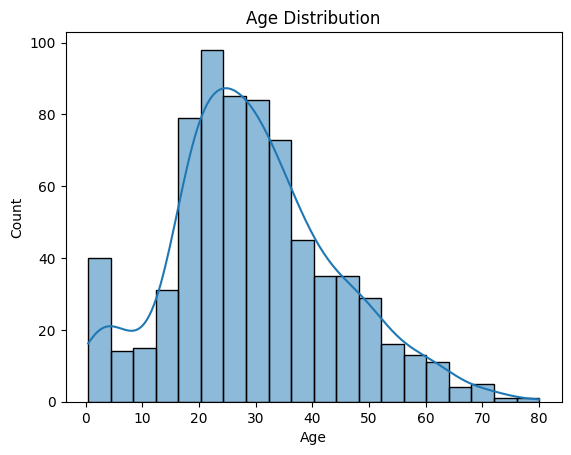

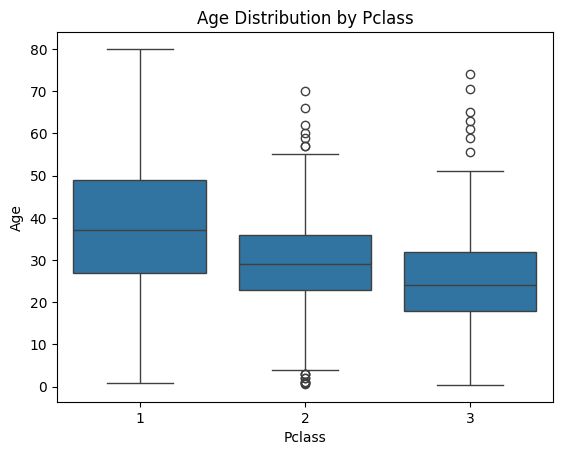

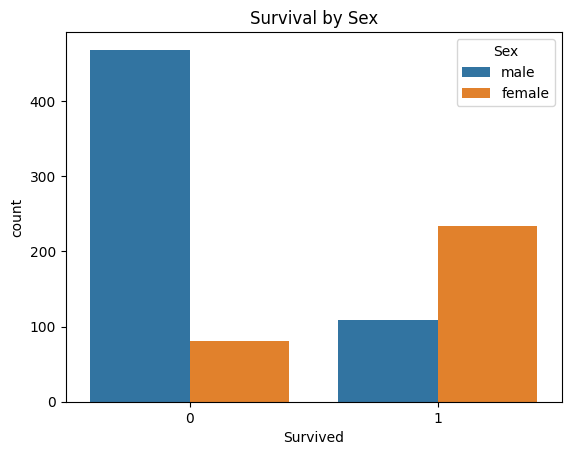

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(titanic.head())

# Get basic information about the dataset
print(titanic.info())

# Summary statistics
print(titanic.describe())

# Check for missing values
print(titanic.isnull().sum())

# Visualize missing values
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Titanic Dataset')
plt.show()

# Visualize the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survival')
plt.show()

# Visualize the distribution of age
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Age Distribution by Pclass')
plt.show()

# Countplot of Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival by Sex')
plt.show()


# Data Preprocessing for Gradient Boosting

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[features + ['Survived']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Convert categorical variables to dummy variables
titanic = pd.get_dummies(titanic, drop_first=True)

# Split the data into training and test sets
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional for Gradient Boosting)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-27-8b5eeee96aeb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'] = imputer.fit_transform(titanic[['Age']])
<ipython-input-27-8b5eeee96aeb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


#  Implement Gradient Boosting

In [ ]:
# Train the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


# Visualize the Result

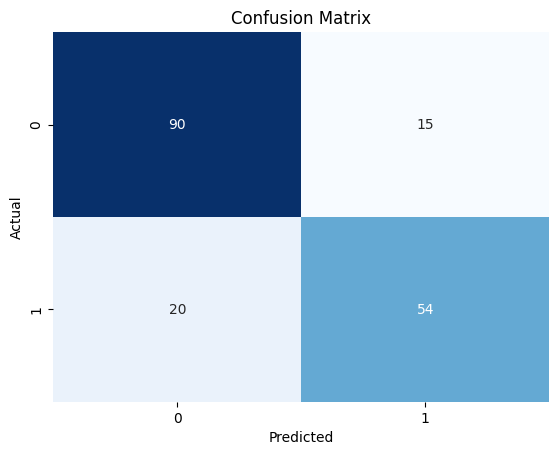

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




# Neural Network

# Load and Explore Data

In [31]:
import pandas as pd

# Load the dataset
titanic = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(titanic.head())

# Get basic information about the dataset
print(titanic.info())

# Summary statistics
print(titanic.describe())

# Check for missing values
print(titanic.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# Perfoam EDA

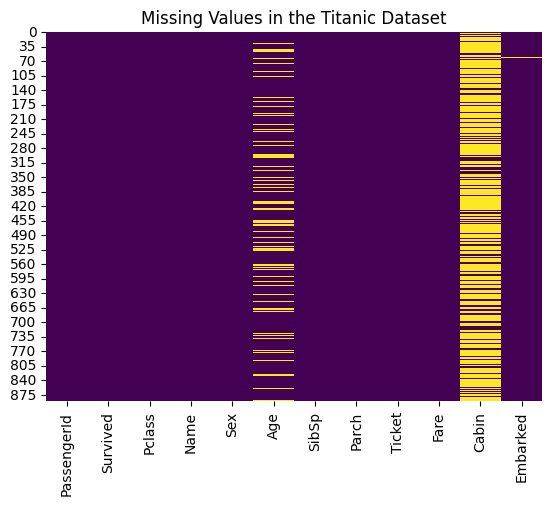

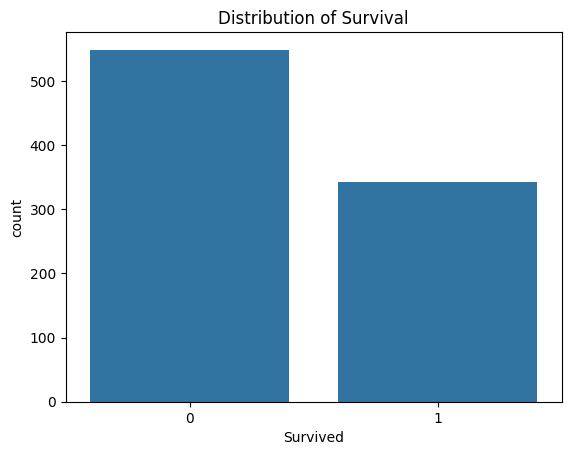

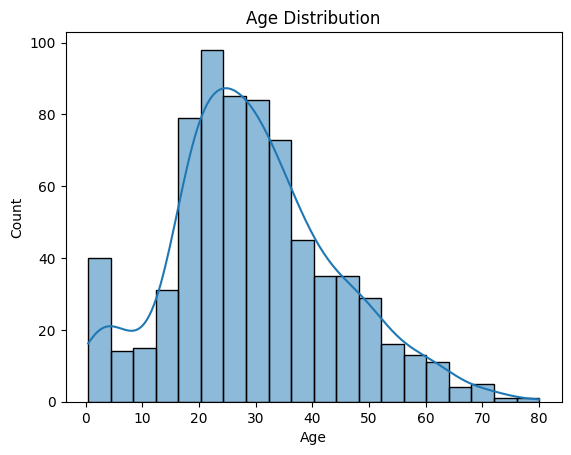

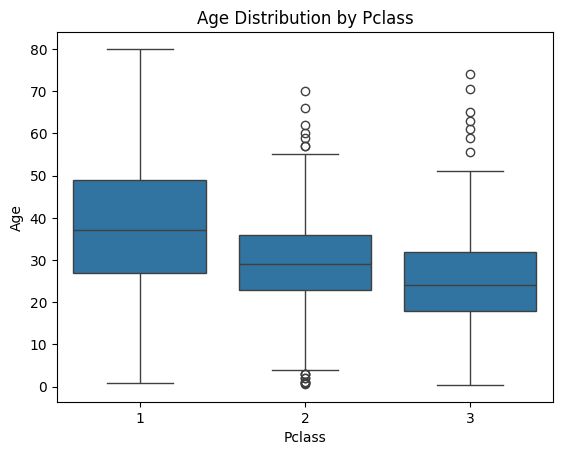

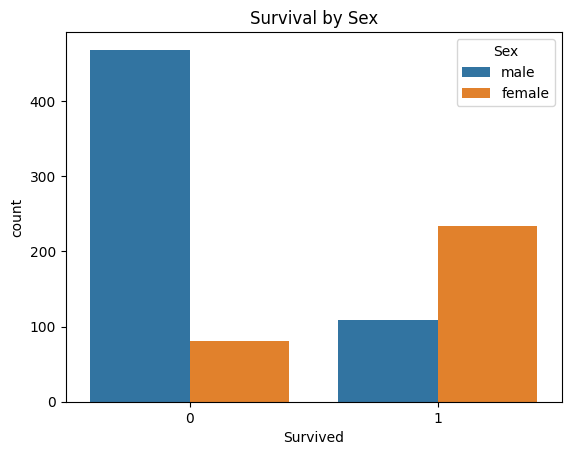

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Titanic Dataset')
plt.show()

# Visualize the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survival')
plt.show()

# Visualize the distribution of age
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Age Distribution by Pclass')
plt.show()

# Countplot of Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival by Sex')
plt.show()


# Data Preprocessing

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[features + ['Survived']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Convert categorical variables to dummy variables
titanic = pd.get_dummies(titanic, drop_first=True)

# Split the data into training and test sets
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Implement Neural Network

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
23/23 [==============================] - 1s 15ms/step - loss: 0.7217 - accuracy: 0.5955 - val_loss: 0.6054 - val_accuracy: 0.7374
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6273 - accuracy: 0.6685 - val_loss: 0.5540 - val_accuracy: 0.7765
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5765 - accuracy: 0.7079 - val_loss: 0.5177 - val_accuracy: 0.7821
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5846 - accuracy: 0.7163 - val_loss: 0.4911 - val_accuracy: 0.7821
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5408 - accuracy: 0.7486 - val_loss: 0.4716 - val_accuracy: 0.7821
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5207 - accuracy: 0.7542 - val_loss: 0.4591 - val_accuracy: 0.8212
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5387 - accuracy: 0.7528 - val_loss: 0.4521 - val_accuracy: 0.8212
Epoch 8/100


# Evaluate and Visualize the Results

6/6 [==============================] - 0s 4ms/step


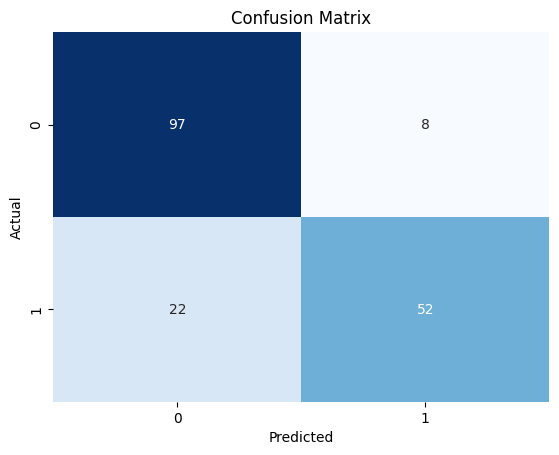

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.70      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179

Accuracy: 0.8324022346368715


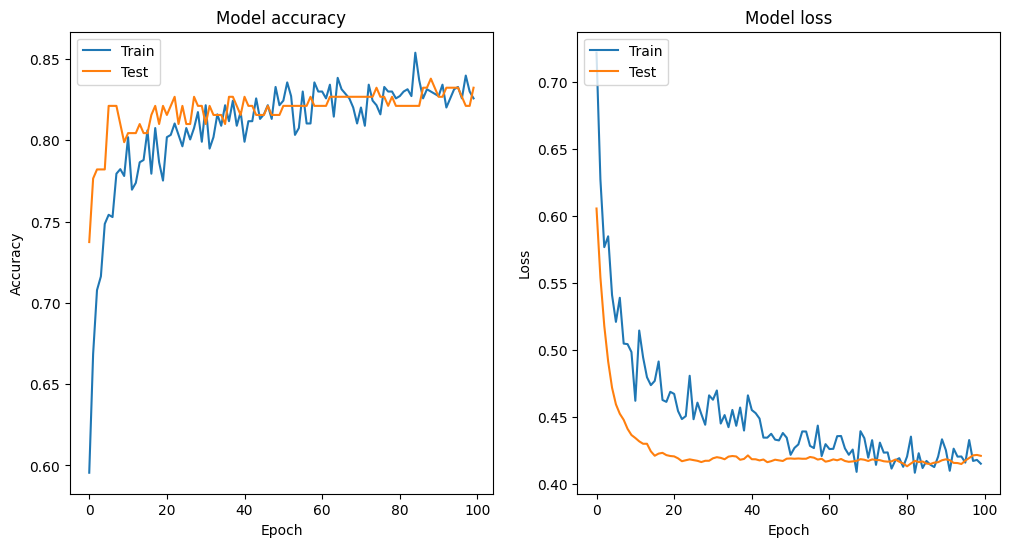

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
